# Notebook for PW10 - Exercise 1 and 2

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, UpSampling2D, \
    Dropout, Activation, Input, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1

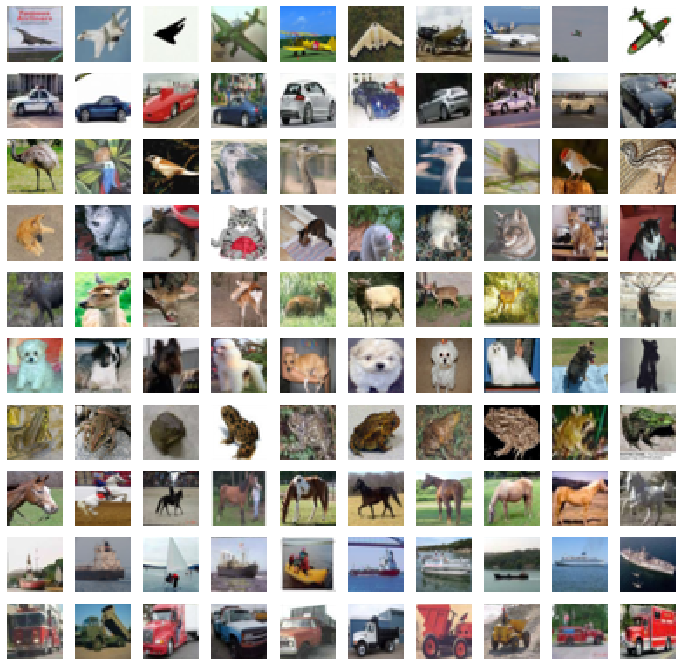

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)


In [19]:
def show_imgs(X,y):
    plt.figure(1, figsize=(12,12))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test, y_test)
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [21]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 256

gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08,
                         zoom_range=0.08)

# Define the data augmentation pipelines, one for train set, one for test set
train_batches = gen.flow(X_train, Y_train, batch_size=BATCH_SIZE)
val_batches = gen.flow(X_test, Y_test, batch_size=BATCH_SIZE)

In [41]:
def create_nn(n_classes=10):
    input_layer = Input(shape=(32,32,3))
    
    x = Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 3))(input_layer)
    x = Activation('relu')(x)
    x = Conv2D(32, kernel_size=(3,3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(32, kernel_size=(3,3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(units=n_classes, activation='softmax')(x)
    
    return Model(inputs=input_layer, outputs=x)

In [46]:
# Compile and train the network
cnn = create_nn()

cnn.compile(loss='categorical_crossentropy', optimizer='adam',
           metrics=['accuracy'])

cnn.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        9248

In [47]:
 log = cnn.fit_generator(train_batches,
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        epochs=50,
                        validation_data=val_batches,
                        validation_steps=len(X_test)/BATCH_SIZE,
                        use_multiprocessing=True)

Epoch 1/50
196/195 [==============================] - 26s 131ms/step - loss: 1.7745 - accuracy: 0.3639 - val_loss: 1.5589 - val_accuracy: 0.4584
Epoch 2/50
196/195 [==============================] - 24s 125ms/step - loss: 1.4599 - accuracy: 0.4787 - val_loss: 1.4113 - val_accuracy: 0.5131
Epoch 3/50
196/195 [==============================] - 25s 128ms/step - loss: 1.3285 - accuracy: 0.5319 - val_loss: 1.2987 - val_accuracy: 0.5533
Epoch 4/50
196/195 [==============================] - 24s 124ms/step - loss: 1.2303 - accuracy: 0.5687 - val_loss: 1.2078 - val_accuracy: 0.5852
Epoch 5/50
196/195 [==============================] - 24s 124ms/step - loss: 1.1593 - accuracy: 0.5936 - val_loss: 1.1784 - val_accuracy: 0.5931
Epoch 6/50
196/195 [==============================] - 25s 126ms/step - loss: 1.0987 - accuracy: 0.6172 - val_loss: 1.1390 - val_accuracy: 0.6173
Epoch 7/50
196/195 [==============================] - 26s 134ms/step - loss: 1.0573 - accuracy: 0.6296 - val_loss: 1.0813 - val_ac

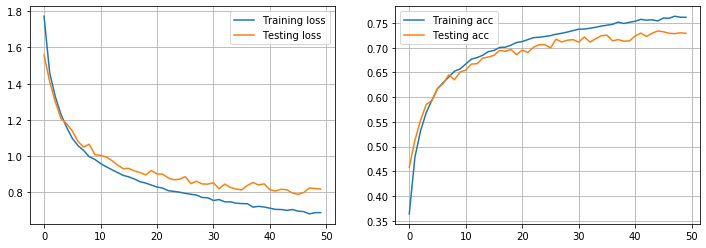

In [48]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [49]:
loss_test, metric_test = cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.7956028982162475
Test accuracy: 0.7414


In [5]:
def create_cnn_non_sequential(n_classes=10):
    input_layer = Input(shape=(32, 32, 3))
    
    conv1 = Conv2D(32, kernel_size=(5, 5), activation='relu')(input_layer)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, kernel_size=(5, 5), activation='relu')(conv1)
    conv1 = MaxPooling2D((3, 3))(conv1)
    conv1_flat = Flatten()(conv1)
    
    conv2 = Conv2D(32, kernel_size=(3,3), activation='relu')(conv1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(32, kernel_size=(3, 3), activation='relu')(conv2)
    conv2 = MaxPooling2D((2,2))(conv2)
    conv2_flat = Flatten()(conv2)
    
    merged = concatenate([conv1_flat, conv2_flat])
    
    x = Dense(100, activation='relu')(merged)
    x = Dense(10, activation='softmax')(x)
    
    return Model(inputs=input_layer, outputs=x)

In [74]:
cnn2 = create_cnn_non_sequential()
cnn2.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])
cnn2.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 28, 28, 32)   2432        input_18[0][0]                   
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 28, 28, 32)   0           conv2d_62[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 24, 24, 32)   25632       dropout_15[0][0]                 
____________________________________________________________________________________________

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 512

gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08,
                         zoom_range=0.08)

# Define the data augmentation pipelines, one for train set, one for test set
train_batches = gen.flow(X_train, Y_train, batch_size=BATCH_SIZE)
val_batches = gen.flow(X_test, Y_test, batch_size=BATCH_SIZE)

In [76]:
checkpointer = ModelCheckpoint('model-{epoch:02d}.h5', verbose=1,
                              monitor='val_accuracy', save_best_only=True,
                              mode='auto')

In [77]:
log2 = cnn2.fit_generator(train_batches,
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        epochs=20,
                        validation_data=val_batches,
                        validation_steps=len(X_test)/BATCH_SIZE,
                        use_multiprocessing=True, 
                          callbacks=[checkpointer])

Epoch 1/20
97/97 [============================>.] - ETA: 0s - loss: 1.8273 - accuracy: 0.3363

Epoch 00001: val_accuracy improved from -inf to 0.43680, saving model to model-01.h5
98/97 [==============================] - 25s 257ms/step - loss: 1.8251 - accuracy: 0.3371 - val_loss: 1.5974 - val_accuracy: 0.4368
Epoch 2/20
97/97 [============================>.] - ETA: 0s - loss: 1.5053 - accuracy: 0.4600
Epoch 00002: val_accuracy improved from 0.43680 to 0.48800, saving model to model-02.h5
98/97 [==============================] - 23s 235ms/step - loss: 1.5048 - accuracy: 0.4604 - val_loss: 1.4658 - val_accuracy: 0.4880
Epoch 3/20
97/97 [============================>.] - ETA: 0s - loss: 1.3958 - accuracy: 0.5016
Epoch 00003: val_accuracy improved from 0.48800 to 0.52940, saving model to model-03.h5
98/97 [==============================] - 23s 239ms/step - loss: 1.3956 - accuracy: 0.5019 - val_loss: 1.3640 - val_accuracy: 0.5294
Epoch 4/20
97/97 [============================>.] - ETA: 0s 

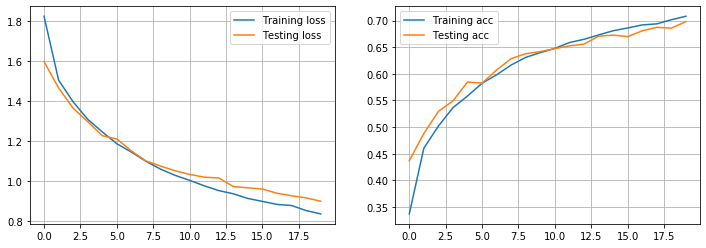

In [83]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log2.history['loss'], label='Training loss')
ax1.plot(log2.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log2.history['accuracy'], label='Training acc')
ax2.plot(log2.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [79]:
cnn2.load_weights('model-20.h5')
loss_test, metric_test = cnn2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8232496737480164
Test accuracy: 0.7177


In [25]:
checkpointer = ModelCheckpoint('cnn3-{epoch:02d}.h5', verbose=1,
                              monitor='val_accuracy', save_best_only=True,
                              mode='auto')

In [7]:
cnn3 = create_cnn_non_sequential()
cnn3.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])
cnn3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   2432        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 28, 28, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 24, 32)   25632       dropout[0][0]                    
______________________________________________________________________________________________

In [11]:
log3 = cnn3.fit_generator(train_batches,
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        epochs=50,
                        validation_data=val_batches,
                        validation_steps=len(X_test)/BATCH_SIZE,
                        use_multiprocessing=True, 
                          callbacks=[checkpointer])

Epoch 1/50
97/97 [============================>.] - ETA: 0s - loss: 1.8585 - accuracy: 0.3264
Epoch 00001: val_accuracy improved from -inf to 0.42270, saving model to cnn3-01.h5
98/97 [==============================] - 29s 295ms/step - loss: 1.8559 - accuracy: 0.3275 - val_loss: 1.6479 - val_accuracy: 0.4227
Epoch 2/50
97/97 [============================>.] - ETA: 0s - loss: 1.5463 - accuracy: 0.4412
Epoch 00002: val_accuracy improved from 0.42270 to 0.46630, saving model to cnn3-02.h5
98/97 [==============================] - 24s 247ms/step - loss: 1.5463 - accuracy: 0.4412 - val_loss: 1.5084 - val_accuracy: 0.4663
Epoch 3/50
97/97 [============================>.] - ETA: 0s - loss: 1.4376 - accuracy: 0.4863
Epoch 00003: val_accuracy improved from 0.46630 to 0.49930, saving model to cnn3-03.h5
98/97 [==============================] - 23s 232ms/step - loss: 1.4368 - accuracy: 0.4866 - val_loss: 1.4205 - val_accuracy: 0.4993
Epoch 4/50
97/97 [============================>.] - ETA: 0s - lo

Epoch 28/50
97/97 [============================>.] - ETA: 0s - loss: 0.7887 - accuracy: 0.7220
Epoch 00028: val_accuracy did not improve from 0.69730
98/97 [==============================] - 23s 239ms/step - loss: 0.7892 - accuracy: 0.7216 - val_loss: 0.8917 - val_accuracy: 0.6972
Epoch 29/50
97/97 [============================>.] - ETA: 0s - loss: 0.7872 - accuracy: 0.7222
Epoch 00029: val_accuracy improved from 0.69730 to 0.70020, saving model to cnn3-29.h5
98/97 [==============================] - 22s 229ms/step - loss: 0.7861 - accuracy: 0.7228 - val_loss: 0.8925 - val_accuracy: 0.7002
Epoch 30/50
97/97 [============================>.] - ETA: 0s - loss: 0.7757 - accuracy: 0.7283
Epoch 00030: val_accuracy did not improve from 0.70020
98/97 [==============================] - 24s 243ms/step - loss: 0.7749 - accuracy: 0.7285 - val_loss: 0.8940 - val_accuracy: 0.6963
Epoch 31/50
97/97 [============================>.] - ETA: 0s - loss: 0.7701 - accuracy: 0.7309
Epoch 00031: val_accuracy i

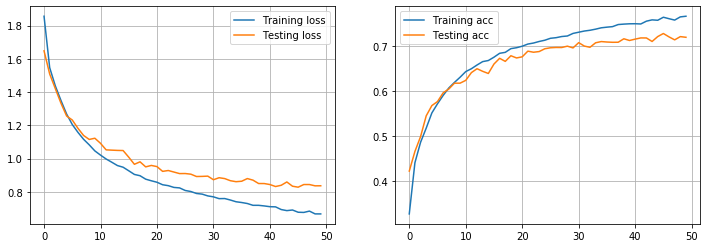

In [12]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log3.history['loss'], label='Training loss')
ax1.plot(log3.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log3.history['accuracy'], label='Training acc')
ax2.plot(log3.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [14]:
cnn3.load_weights('cnn3-46.h5')
loss_test, metric_test = cnn3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.7646084194183349
Test accuracy: 0.7446


In [15]:
def create_cnn_other_arch(n_classes=10):
    input_layer = Input(shape=(32, 32, 3))
    
    conv1 = Conv2D(32, kernel_size=(7, 7), activation='relu')(input_layer)
    conv1 = Conv2D(32, kernel_size=(7, 7), activation='relu')(conv1)
    conv1 = MaxPooling2D((4, 4))(conv1)
    conv1_flat = Flatten()(conv1)
    
    conv2 = Conv2D(32, kernel_size=(5, 5), activation='relu')(input_layer)
    conv2 = Conv2D(32, kernel_size=(5, 5), activation='relu')(conv2)
    conv2 = MaxPooling2D((3, 3))(conv2)
    conv2_flat = Flatten()(conv2)
    
    conv3 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
    conv3 = Conv2D(32, kernel_size=(3, 3), activation='relu')(conv3)
    conv3 = MaxPooling2D((2, 2))(conv3)
    conv3_flat = Flatten()(conv3)
    
    merged = concatenate([conv1_flat, conv2_flat, conv3_flat])
    
    x = Dense(100, activation='relu')(merged)
    x = Dropout(0.5)(x)
    x = Dense(10, activation=None)(x)
    x = Dropout(0.2)(x)
    x = Activation('softmax')(x)
    
    return Model(inputs=input_layer, outputs=x)

In [17]:
cnn5 = create_cnn_other_arch()
cnn5.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])
cnn5.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 26, 26, 32)   4736        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 28, 32)   2432        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 30, 30, 32)   896         input_4[0][0]                    
____________________________________________________________________________________________

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 256

gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08,
                         zoom_range=0.08)

# Define the data augmentation pipelines, one for train set, one for test set
train_batches = gen.flow(X_train, Y_train, batch_size=BATCH_SIZE)
val_batches = gen.flow(X_test, Y_test, batch_size=BATCH_SIZE)

In [26]:
log5 = cnn5.fit_generator(train_batches,
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        epochs=50,
                        validation_data=val_batches,
                        validation_steps=len(X_test)/BATCH_SIZE,
                        use_multiprocessing=True, 
                          callbacks=[checkpointer])

Epoch 1/50
195/195 [============================>.] - ETA: 0s - loss: 1.9421 - accuracy: 0.2941
Epoch 00001: val_accuracy improved from -inf to 0.46030, saving model to cnn3-01.h5
196/195 [==============================] - 26s 132ms/step - loss: 1.9411 - accuracy: 0.2946 - val_loss: 1.5836 - val_accuracy: 0.4603
Epoch 2/50
195/195 [============================>.] - ETA: 0s - loss: 1.7004 - accuracy: 0.3920
Epoch 00002: val_accuracy improved from 0.46030 to 0.52830, saving model to cnn3-02.h5
196/195 [==============================] - 25s 127ms/step - loss: 1.7001 - accuracy: 0.3919 - val_loss: 1.4365 - val_accuracy: 0.5283
Epoch 3/50
195/195 [============================>.] - ETA: 0s - loss: 1.6087 - accuracy: 0.4244
Epoch 00003: val_accuracy improved from 0.52830 to 0.53570, saving model to cnn3-03.h5
196/195 [==============================] - 25s 129ms/step - loss: 1.6079 - accuracy: 0.4246 - val_loss: 1.3922 - val_accuracy: 0.5357
Epoch 4/50
195/195 [============================>.] 

Epoch 28/50
195/195 [============================>.] - ETA: 0s - loss: 1.1998 - accuracy: 0.5691
Epoch 00028: val_accuracy improved from 0.68990 to 0.69500, saving model to cnn3-28.h5
196/195 [==============================] - 27s 139ms/step - loss: 1.1999 - accuracy: 0.5692 - val_loss: 0.9267 - val_accuracy: 0.6950
Epoch 29/50
195/195 [============================>.] - ETA: 0s - loss: 1.1948 - accuracy: 0.5714
Epoch 00029: val_accuracy did not improve from 0.69500
196/195 [==============================] - 28s 143ms/step - loss: 1.1947 - accuracy: 0.5714 - val_loss: 0.9405 - val_accuracy: 0.6878
Epoch 30/50
195/195 [============================>.] - ETA: 0s - loss: 1.1875 - accuracy: 0.5757
Epoch 00030: val_accuracy did not improve from 0.69500
196/195 [==============================] - 28s 143ms/step - loss: 1.1877 - accuracy: 0.5756 - val_loss: 0.9128 - val_accuracy: 0.6911
Epoch 31/50
195/195 [============================>.] - ETA: 0s - loss: 1.1726 - accuracy: 0.5806
Epoch 00031: 

In [27]:
cnn5.load_weights('cnn3-43.h5')
loss_test, metric_test = cnn5.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8415504640579223
Test accuracy: 0.7197


### Table of results

| CNN | Acc. train | Acc. test | Comments |
|--------------------------------|------------|-----------|--------------|
|  CNN2 | 70.81 | 71.77 | 20 Epochs |
|  CNN3 | 76.67 | 74.46 | 50 Epochs |
|  CNN5 | 59.90 | 71.97 | 50 Epochs |

CNN3 is the best model so far. The model was trained using different blocks and convoluting the output as well as use it directly to input it to a dense layer. With 50 epochs the model achieved a test accuracy of 74.46.

## Exercise 2

In [55]:
from PIL import Image 
import os 

if not os.path.exists('data/'):
    os.mkdir('data') 
    os.mkdir('data/train') 
    os.mkdir('data/test') 

    for c in range(10):     
        os.mkdir('data/train/{}'.format(c))  
        os.mkdir('data/test/{}'.format(c))

index = 0
for i,im in enumerate(X_train):     
    image = Image.fromarray((im*255).astype('uint8'))
    image.save("data/train/{}/{}.jpeg".format(y_train[i][0], index))     
    index += 1 

index = 0 
for i,im in enumerate(X_test):     
    image = Image.fromarray((im*255).astype('uint8'))     
    image.save("data/test/{}/{}.jpeg".format(y_test[i][0], index))     
    index += 1

In [3]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(160, 160, 3), 
                                                       include_top=False, 
                                                       weights='imagenet')

In [4]:
model_mobnet = Sequential([
    model,
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [5]:
model_mobnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3200100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 5,459,094
Trainable params: 5,424,982
Non-trainable params: 34,112
_________________________________________________________________


In [6]:
def preprocess_img(image):
    return (image/127.5) - 1

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

gen = ImageDataGenerator(preprocessing_function=preprocess_img)
train_batches = gen.flow_from_directory('data/train',
                                 target_size=(160,160), 
                                  batch_size=BATCH_SIZE,
                                 shuffle=True)

# Define the data augmentation pipelines, one for train set, one for test set
val_batches = gen.flow_from_directory('data/test',
                                     target_size=(160,160),
                                     batch_size=BATCH_SIZE,
                                     shuffle=False)


Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [8]:
model_mobnet.compile(loss='categorical_crossentropy', optimizer='adam',
                    metrics=['accuracy'])

In [9]:
log4 = model_mobnet.fit_generator(train_batches,
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        epochs=5,
                        validation_data=val_batches,
                        validation_steps=len(X_test)/BATCH_SIZE,
                        use_multiprocessing=True)

Epoch 1/5
1563/1562 [==============================] - 665s 426ms/step - loss: 1.4117 - accuracy: 0.5273 - val_loss: 2.3093 - val_accuracy: 0.1003
Epoch 2/5
1563/1562 [==============================] - 671s 429ms/step - loss: 1.2996 - accuracy: 0.5564 - val_loss: 6.4362 - val_accuracy: 0.1184
Epoch 3/5
1563/1562 [==============================] - 667s 427ms/step - loss: 1.1169 - accuracy: 0.6141 - val_loss: 3.2344 - val_accuracy: 0.2320
Epoch 4/5
1563/1562 [==============================] - 668s 427ms/step - loss: 1.0426 - accuracy: 0.6446 - val_loss: 6.1227 - val_accuracy: 0.1794
Epoch 5/5
1563/1562 [==============================] - 669s 428ms/step - loss: 1.0133 - accuracy: 0.6568 - val_loss: 2.0718 - val_accuracy: 0.3503


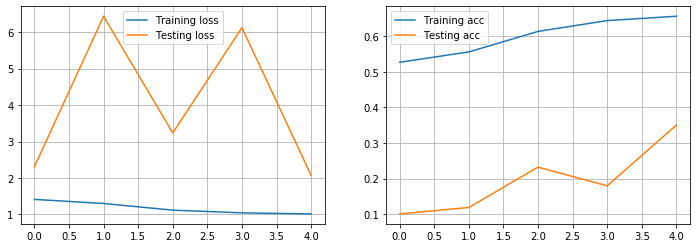

In [12]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log4.history['loss'], label='Training loss')
ax1.plot(log4.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log4.history['accuracy'], label='Training acc')
ax2.plot(log4.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Comment
We may need more epochs but it is very compute-intensive so I stopped after 1 hour and 5 epochs of training..
But after more epochs the results may get better.